In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [2]:
crypto_df=pd.read_csv('crypto_data.csv')

In [3]:
crypto_df

,Unnamed: 0,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,True,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,True,PoW,NaN,611000
4,808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...,...
1247,XBC,BitcoinPlus,Scrypt,True,PoS,1.283270e+05,1000000
1248,DVTC,DivotyCoin,Scrypt,False,PoW/PoS,2.149121e+07,100000000
1249,GIOT,Giotto Coin,Scrypt,False,PoW/PoS,NaN,233100000
1250,OPSC,OpenSourceCoin,SHA-256,False,PoW/PoS,NaN,21000000


In [4]:
sorted_df=crypto_df.loc[crypto_df['IsTrading']==True]
sorted_df=sorted_df.drop('IsTrading', axis=1)
sorted_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
1,365,365Coin,X11,PoW/PoS,NaN,2300000000
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
3,611,SixEleven,SHA-256,PoW,NaN,611000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
...,...,...,...,...,...,...
1243,SERO,Super Zero,Ethash,PoW,NaN,1000000000
1244,UOS,UOS,SHA-256,DPoI,NaN,1000000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [5]:
cleaned_df=sorted_df.dropna()
cleaned_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
4,808,808,SHA-256,PoW/PoS,0.000000e+00,0
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [6]:
filted_df=cleaned_df.loc[cleaned_df['TotalCoinsMined']>0]
filted_df

,Unnamed: 0,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
0,42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
2,404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
5,1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
7,BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
8,ETH,Ethereum,Ethash,PoW,1.076842e+08,0
...,...,...,...,...,...,...
1238,ZEPH,ZEPHYR,SHA-256,DPoS,2.000000e+09,2000000000
1242,GAP,Gapcoin,Scrypt,PoW/PoS,1.493105e+07,250000000
1245,BDX,Beldex,CryptoNight,PoW,9.802226e+08,1400222610
1246,ZEN,Horizen,Equihash,PoW,7.296538e+06,21000000


In [7]:
dropped_df=filted_df.drop(['Unnamed: 0', 'CoinName'], axis=1)
print(dropped_df.dtypes)
dropped_df=dropped_df.astype({'TotalCoinSupply': 'float'})


Algorithm           object
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object


In [8]:
dummy_df=pd.get_dummies(dropped_df, columns=['Algorithm', 'ProofType'])
dummy_df

,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
0,4.199995e+01,4.200000e+01,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
2,1.055185e+09,5.320000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
5,2.927942e+10,3.141593e+11,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
7,1.792718e+07,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,1.076842e+08,0.000000e+00,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1238,2.000000e+09,2.000000e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1242,1.493105e+07,2.500000e+08,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1245,9.802226e+08,1.400223e+09,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1246,7.296538e+06,2.100000e+07,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
scaler = StandardScaler().fit(dummy_df)
scaled_data = scaler.transform(dummy_df)
scaled_data

array([[-0.11710817, -0.1528703 , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.09396955, -0.145009  , -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [ 0.52494561,  4.48942416, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       ...,
       [-0.09561336, -0.13217937, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11694817, -0.15255998, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ],
       [-0.11710536, -0.15285552, -0.0433963 , ..., -0.0433963 ,
        -0.0433963 , -0.0433963 ]])

In [10]:
pca = PCA(n_components=0.90)
crypto_pca = pca.fit_transform(scaled_data)
print(f'{pca.explained_variance_ratio_}')
len(pca.explained_variance_ratio_)

[0.0279317  0.02141802 0.02051615 0.02044661 0.0204466  0.0204466
 0.0204466  0.02042554 0.01870913 0.01756291 0.01741106 0.01629007
 0.01596154 0.01551138 0.01435005 0.01321122 0.01236583 0.01206255
 0.01104295 0.01071499 0.01049079 0.01040887 0.01039089 0.01037741
 0.01035414 0.01034034 0.01029605 0.01028233 0.01028139 0.01028139
 0.01028138 0.01027965 0.01027051 0.01026331 0.01026202 0.01025761
 0.01025565 0.01025068 0.01024924 0.01024279 0.01024259 0.01024259
 0.0102419  0.01024018 0.01023676 0.01023495 0.01023    0.01022442
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233  0.0102233  0.0102233  0.0102233  0.0102233
 0.0102233  0.0102233 ]


74

In [11]:
crypto_pca_df = pd.DataFrame(data=crypto_pca)
crypto_pca_df

,0,1,2,3,4,5,6,7,8,9,...,64,65,66,67,68,69,70,71,72,73
0,-0.335099,1.032189,-0.590713,0.001397,2.984956e-12,-5.587163e-15,-4.070858e-16,-0.007129,-1.319756,-0.051813,...,-2.470702e-15,1.891693e-15,-5.539121e-15,-1.279294e-15,-1.078497e-15,-3.351254e-15,3.226812e-15,9.572342e-16,-2.114694e-15,8.762218e-16
1,-0.318434,1.032331,-0.591126,0.001386,2.960484e-12,-5.826890e-15,-4.050436e-16,-0.007739,-1.322514,-0.056674,...,-2.751444e-15,1.650072e-15,-5.142541e-15,-7.870911e-16,-6.950084e-16,-3.692322e-15,3.801505e-15,2.285337e-15,-1.731003e-15,8.828233e-16
2,2.305468,1.656383,-0.683617,0.004731,1.016664e-11,-5.720923e-15,7.053242e-15,-0.054781,-1.542879,-0.943951,...,1.836982e-14,-1.610794e-14,4.401464e-14,9.704872e-15,-2.412961e-14,7.415236e-14,-7.963189e-14,-3.510378e-14,1.064824e-13,-6.609163e-14
3,-0.145184,-1.320593,0.192813,-0.001229,-2.640153e-12,2.427808e-15,-1.548256e-15,-0.002071,0.281463,0.251862,...,2.149155e-15,4.212773e-15,-2.388025e-17,-6.512118e-15,-3.653415e-15,6.466600e-15,-9.028861e-15,4.033250e-15,1.681151e-14,-9.086748e-15
4,-0.151768,-2.036192,0.396182,-0.001705,-3.658854e-12,-8.999548e-16,-1.106936e-15,0.027735,0.519099,0.188820,...,8.462173e-14,1.200669e-14,-4.413189e-14,1.435070e-14,1.071627e-14,-3.707038e-14,-3.236237e-14,-4.319863e-14,1.135017e-13,-1.393439e-13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
527,2.471251,0.822241,-0.071160,-0.008206,-1.779618e-11,4.790188e-16,2.484975e-14,-0.851713,2.041159,3.560713,...,3.356077e-15,3.054632e-15,1.184845e-16,-9.016242e-15,-5.463436e-15,1.170078e-14,-8.315454e-15,2.651186e-15,1.957447e-14,-1.482794e-14
528,-0.333144,1.032071,-0.590740,0.001399,2.990027e-12,-5.703373e-15,-3.884003e-16,-0.007154,-1.320125,-0.052460,...,-2.773426e-15,1.946052e-15,-5.305747e-15,-6.355024e-16,-6.757706e-16,-3.431540e-15,3.302184e-15,1.615773e-15,-2.035311e-15,9.262904e-16
529,0.324349,-2.312308,0.421515,-0.001319,-2.822872e-12,3.798908e-15,-3.554616e-15,0.017309,0.161077,-0.047787,...,1.406014e-14,-1.330168e-14,-5.034158e-14,2.123109e-14,-9.023474e-15,7.422448e-14,2.937163e-14,9.987933e-15,5.106975e-14,-1.020073e-13
530,-0.149364,-2.049336,0.412968,-0.001745,-3.741091e-12,4.690191e-15,-2.985477e-15,0.028954,0.544389,0.233373,...,-1.599624e-15,2.771130e-15,-5.105881e-15,-4.184051e-15,2.681990e-15,-2.097968e-16,-2.102228e-15,3.900490e-15,-2.423699e-15,9.922657e-17


In [12]:
tsne = TSNE(learning_rate=35)

In [15]:
tsne_features = tsne.fit_transform(crypto_pca)
tsne_features.shape

(532, 2)

In [17]:
# The first column of transformed features
crypto_pca_df['x'] = tsne_features[:,0]

# The second column of transformed features
crypto_pca_df['y'] = tsne_features[:,1]

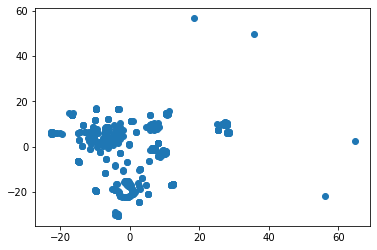

In [18]:
# Visualize the clusters
plt.scatter(crypto_pca_df['x'], crypto_pca_df['y'])
plt.show()

1: inertia=171982.171875
2: inertia=105249.578125
3: inertia=52246.796875
4: inertia=35083.64453125
5: inertia=28591.24609375
6: inertia=24405.18359375
7: inertia=20470.056640625
8: inertia=17788.212890625
9: inertia=15233.177734375
10: inertia=12430.41796875


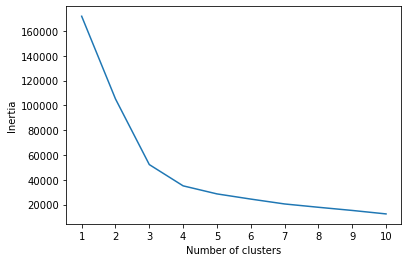

In [19]:
# Identify the best number of clusters using the elbow curve
inertia = []
# Same as k = list(range(1, 11))
k = [1,2,3,4,5,6,7,8,9,10]


# Looking for the best k
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(tsne_features)
    inertia.append(km.inertia_)
    print(f'{i}: inertia={km.inertia_}')

# Define a DataFrame to plot the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)

plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

# Conclusion/Analysis
After preparing the data and performing the dimensionality reduction, I can conclude that the cryptocurrencies can be clusted together with 4 clusters. This is supported by an elbow being present at k=4.